In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
#plt. style.use([' seaborn-bright', 'dark_background'])

# to visualize the dicision tree
from sklearn.tree import export_graphviz
from graphviz import render

In [137]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Diginique Internship/Project/explored_weather_data.csv")

In [138]:
df = pd.read_csv("explored_weather_data.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139354 entries, 0 to 139353
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       139354 non-null  int64  
 1   MinTemp          139354 non-null  float64
 2   MaxTemp          139354 non-null  float64
 3   WindGustSpeed    139354 non-null  float64
 4   WindSpeed9am     139354 non-null  float64
 5   WindSpeed3pm     139354 non-null  float64
 6   Humidity9am      139354 non-null  float64
 7   Humidity3pm      139354 non-null  float64
 8   Pressure9am      139354 non-null  float64
 9   Pressure3pm      139354 non-null  float64
 10  Temp9am          139354 non-null  float64
 11  Temp3pm          139354 non-null  float64
 12  RainToday        139354 non-null  float64
 13  RainTomorrow     139354 non-null  float64
 14  WindGustDir_E    139354 non-null  int64  
 15  WindGustDir_ENE  139354 non-null  int64  
 16  WindGustDir_ESE  139354 non-null  int6

In [140]:
df.columns

Index(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September'],
      dtype='object')

In [144]:
df = df.drop(columns = ["Unnamed: 0"])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139354 entries, 0 to 139353
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          139354 non-null  float64
 1   MaxTemp          139354 non-null  float64
 2   WindGustSpeed    139354 non-null  float64
 3   WindSpeed9am     139354 non-null  float64
 4   WindSpeed3pm     139354 non-null  float64
 5   Humidity9am      139354 non-null  float64
 6   Humidity3pm      139354 non-null  float64
 7   Pressure9am      139354 non-null  float64
 8   Pressure3pm      139354 non-null  float64
 9   Temp9am          139354 non-null  float64
 10  Temp3pm          139354 non-null  float64
 11  RainToday        139354 non-null  float64
 12  RainTomorrow     139354 non-null  float64
 13  WindGustDir_E    139354 non-null  int64  
 14  WindGustDir_ENE  139354 non-null  int64  
 15  WindGustDir_ESE  139354 non-null  int64  
 16  WindGustDir_N    139354 non-null  int6

## Splitting the data

In [67]:
X = df.drop(columns = ['RainToday', 'RainTomorrow'])
Y = df['RainToday']

# Using the dicision tree algorithm from sklearn

In [68]:
from sklearn. model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train. shape, y_test.shape

((111483, 39), (27871, 39), (111483,), (27871,))

In [69]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( criterion = "entropy", class_weight = 'balanced')
# classifier = DTC()

In [70]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

# performance of the model

In [71]:
from sklearn.metrics import classification_report
print (classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86605
         1.0       1.00      1.00      1.00     24878

    accuracy                           1.00    111483
   macro avg       1.00      1.00      1.00    111483
weighted avg       1.00      1.00      1.00    111483



In [72]:
predicted_values = classifier.predict(x_test)
print (classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     21651
         1.0       0.51      0.52      0.51      6220

    accuracy                           0.78     27871
   macro avg       0.69      0.69      0.69     27871
weighted avg       0.78      0.78      0.78     27871



In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_values)

0.7819238635140469

# Pruning

In [74]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Helper functions

In [75]:
from sklearn. metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)

    predict = model.predict(x1)
    f1 = f1_score(y1, predict)

    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    return f1, f2

In [76]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'tran_Score')
    plt.plot(x_axis, test_score, color = 'blue', label = "test_Score")
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1 score")
    plt.show()

### Max Depth

In [77]:
maxdepth = [i for i in range (1,30)]
train = []
test = []
for i in maxdepth:
    model = DTC (class_weight = 'balanced', max_depth = i, random_state = 98)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

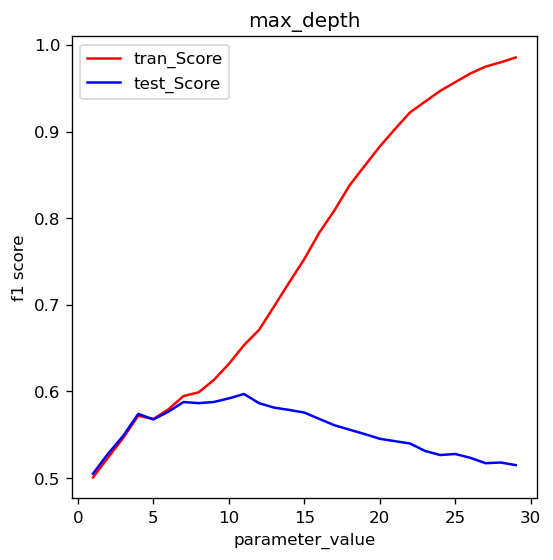

In [78]:
effect(train, test, range(1,30), "max_depth")

In [79]:
MaxDepth = 7

### Min Sample Split

In [80]:
min_samples = [i for i in range (2,1000,10)]
train = []
test = []
for i in min_samples:
    model = DTC (class_weight = 'balanced', min_samples_split = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

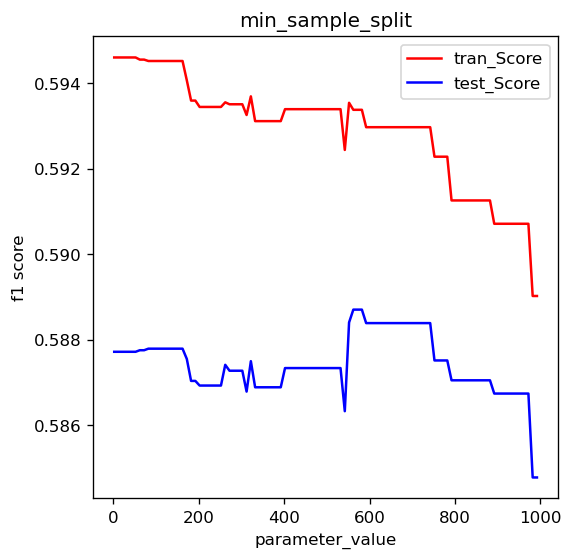

In [81]:
effect(train, test, range(2,1000,10), "min_sample_split")

In [122]:
MinSamplesSplit = 580

### Max leaf Node

In [83]:
maxleafnodes = [i for i in range(2,200,20)]
train = []
test = []
for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

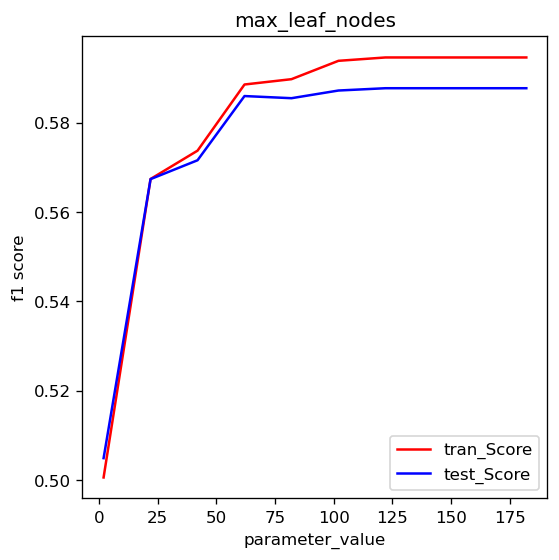

In [84]:
effect(train, test, range(2,200,20), "max_leaf_nodes")

In [116]:
MaxLeafNodes = 60

### Min Sample leaf

In [86]:
minsamplesleaf = [i for i in range(2,500,25)]
train = []
test = []
for i in minsamplesleaf:
    model = DTC (class_weight = 'balanced', min_samples_leaf = i, random_state = 98, max_depth = MaxDepth)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

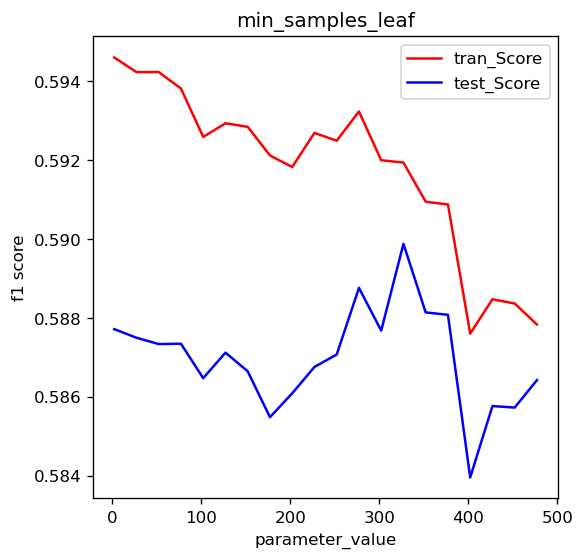

In [87]:
effect(train, test, range(2,500,25), "min_samples_leaf")

In [128]:
MinSamplesLeaf = 320

# Updated model

In [129]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( criterion = "entropy", class_weight = 'balanced', max_depth = MaxDepth, min_samples_split = MinSamplesSplit, max_leaf_nodes = MaxLeafNodes, min_samples_leaf = MinSamplesLeaf)


In [130]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

#### Performance of updated model

In [131]:
from sklearn.metrics import classification_report
print (classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82     86605
         1.0       0.47      0.77      0.58     24878

    accuracy                           0.75    111483
   macro avg       0.69      0.76      0.70    111483
weighted avg       0.82      0.75      0.77    111483



In [132]:
predicted_values = classifier.predict(x_test)
print (classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82     21651
         1.0       0.47      0.77      0.58      6220

    accuracy                           0.75     27871
   macro avg       0.69      0.76      0.70     27871
weighted avg       0.82      0.75      0.77     27871



In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_values)


0.7522873237415234

# visualizing the updated model

In [134]:
# export_graphviz (decision_tree = classifier, out_file = 'tree_viz', max_depth=MaxDepth, feature_names = X.columns, label = "none", impurity = False)
# render( filepath='tree_viz', format = 'png', engine = 'neato')


# Dumping to pkl file

In [135]:
import pickle
pickle.dump(classifier, open("RainToday.pkl", "wb"))